In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
sns.set(rc={'figure.figsize':(15,10)})
pd.set_option('display.max_columns', None)
import pickle

In [2]:
dataset=pd.read_csv('Datasets/scaled_csv')

In [3]:
y=dataset['income']
X=dataset.drop('income',axis=1)

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score

In [10]:
## Support vector Classifier
model1=SVC()
model1.fit(X_train,y_train)
train_pred1 = model1.predict(X_train)
y_pred1=model1.predict(X_test)
print('Training Accuracy ', accuracy_score(train_pred1,y_train))
print('Test Accuracy ', accuracy_score(y_pred1,y_test))

## pickling trained model
pickle_out = open('model1_svc.pkl','wb')
pickle.dump(model1,pickle_out)
pickle_out.close()

Training Accuracy  0.8309686888454012
Test Accuracy  0.8276118939723136


In [12]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
model2=LogisticRegression()
model2.fit(X_train,y_train)
train_pred2 = model2.predict(X_train)
y_pred2=model2.predict(X_test)
print('Training Accuracy ', accuracy_score(train_pred2,y_train))
print('Test Accuracy ', accuracy_score(y_pred2,y_test))
pickle_out = open('model2_log_reg.pkl','wb')
pickle.dump(model2,pickle_out)
pickle_out.close()

Training Accuracy  0.8060787671232876
Test Accuracy  0.8035880563660066


In [13]:
## Descion tree classifier
from sklearn.tree import DecisionTreeClassifier
model3=DecisionTreeClassifier()
model3.fit(X_train,y_train)
train_pred3 = model3.predict(X_train)
y_pred3=model2.predict(X_test)
print('Training Accuracy ', accuracy_score(train_pred3,y_train))
print('Test Accuracy ', accuracy_score(y_pred3,y_test))
pickle_out = open('model3_Dtc.pkl','wb')
pickle.dump(model3,pickle_out)
pickle_out.close()

Training Accuracy  0.9998776908023483
Test Accuracy  0.8035880563660066


- We can observe that our model is our model is `overfitted`

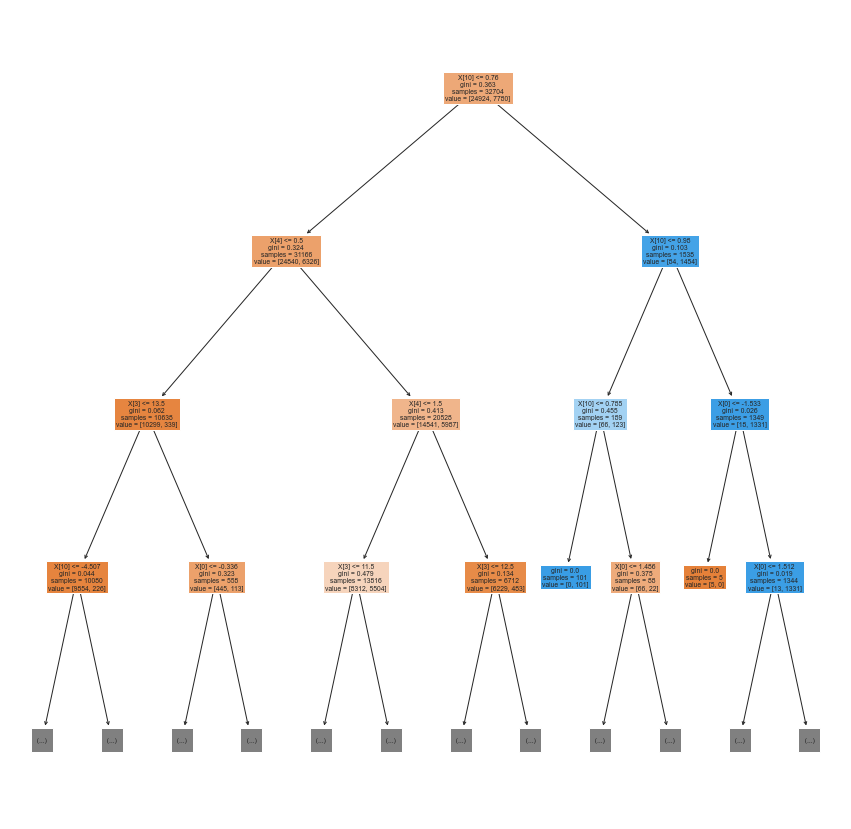

In [14]:
from sklearn import tree
fig=plt.figure(figsize=(15,15))
tree.plot_tree(model3,filled=True,max_depth=3)
plt.show()

### Hyperparameter tuning for Decision tree classifier using GridSearchCV

In [16]:
## Hyper parameters
from sklearn.model_selection import GridSearchCV
grid_param={
    'criterion':['gini','entropy'],
    'max_depth':range(2,10,1),
    'min_samples_split':range(1,8,1),
    'min_samples_leaf':range(1,10,1),
    'splitter':['best','random']
    
}

In [17]:
dtc_tuned_model=DecisionTreeClassifier()
grid1=GridSearchCV(estimator=dtc_tuned_model,param_grid=grid_param,cv=2,n_jobs=2)
grid1.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=2,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(1, 8),
                         'splitter': ['best', 'random']})

In [18]:
pickle_out = open('grid1_dtc.pkl','wb')
pickle.dump(grid1,pickle_out)
pickle_out.close()

In [19]:
grid1.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'min_samples_leaf': 8,
 'min_samples_split': 4,
 'splitter': 'best'}

In [20]:
grid1.best_score_

0.8530149217221135

In [22]:
train_acc_grid1=grid1.predict(X_train)
y_grid_pred1=grid1.predict(X_test)
print('Training Accuracy ', accuracy_score(train_acc_grid1,y_train))
print('Test Accuracy ', accuracy_score(y_grid_pred1,y_test))

Training Accuracy  0.8589774951076321
Test Accuracy  0.855732820162642


<b>
- After Hyperparameter tuning now overfitting has reduced drastically.<br>
- And test accuracy is also improved </b>

In [24]:
confusion_mat=confusion_matrix(y_grid_pred1,y_test)
confusion_mat

array([[11746,  1866],
       [  458,  2039]], dtype=int64)

In [25]:
true_pos=confusion_mat[0][0]
fal_pos=confusion_mat[0][1]
fal_neg=confusion_mat[1][0]
tru_neg=confusion_mat[1][1]
accuracy=(true_pos+tru_neg)/(true_pos+fal_pos+fal_neg+tru_neg)
accuracy

0.855732820162642

In [26]:
precision=true_pos/(true_pos+fal_pos)
precision

0.8629150749338819

In [27]:
recall=true_pos/(true_pos+fal_neg)
recall

0.9624713208784005

In [28]:
# F1 Score
F1_Score = 2*(recall * precision) / (recall + precision)
F1_Score

0.9099783080260303

#### ROC AUC Curve

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [30]:
pred=[]
for model in [grid1]:
    ## Prediction that the outcome being 1
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
    
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
final_prediction

0        0.005926
1        0.014881
2        0.057870
3        0.086351
4        0.007184
           ...   
16104    0.007937
16105    0.054608
16106    0.470226
16107    0.067947
16108    0.313913
Length: 16109, dtype: float64

In [31]:
print('Decision test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Decision test roc-auc: 0.9049938497526682


In [32]:

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)

pd.DataFrame(data={'fpr':fpr,'tpr':tpr,'thresholds':thresholds})

,fpr,tpr,thresholds
0,0.000000,0.000000,2.000000
1,0.000819,0.249424,1.000000
2,0.001147,0.258131,0.893333
3,0.001393,0.258643,0.888889
4,0.001967,0.263508,0.875000
...,...,...,...
90,0.656178,0.988988,0.007937
91,0.687725,0.990525,0.007184
92,0.714274,0.992061,0.005926
93,0.741806,0.992830,0.001541


In [33]:
accuracy_list=[]
for thres in thresholds:
    y_pred=np.where(final_prediction>thres,1,0)
    accuracy_list.append(accuracy_score(y_test,y_pred,normalize=True))

In [34]:
   
accuracy_ls=pd.concat([pd.Series(thresholds),pd.Series(accuracy_list)],axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls

,thresholds,accuracy
22,0.450820,0.857285
23,0.444444,0.856292
24,0.438994,0.856229
21,0.470226,0.855795
19,0.500000,0.855733
...,...,...
90,0.007937,0.504252
91,0.007184,0.500217
92,0.005926,0.476690
93,0.001541,0.456950


In [35]:
pd.DataFrame({'acutal':np.array(y_test),'final_p':np.array(final_prediction),'normal_pred':y_pred3,'predicted(t=0.450820)':np.where(final_prediction>0.450820,1,0)})

,acutal,final_p,normal_pred,predicted(t=0.450820)
0,0,0.005926,0,0
1,0,0.014881,0,0
2,0,0.057870,0,0
3,0,0.086351,0,0
4,0,0.007184,0,0
...,...,...,...,...
16104,0,0.007937,0,0
16105,0,0.054608,0,0
16106,0,0.470226,0,1
16107,0,0.067947,0,0


In [36]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr,tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

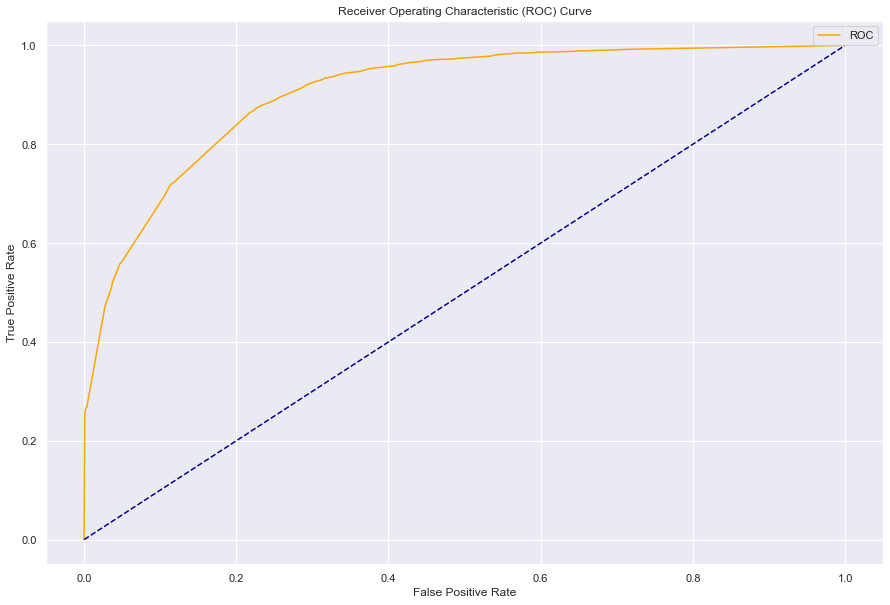

In [37]:
plot_roc_curve(fpr,tpr)